In [2]:
import pandas as pd
df = pd.read_csv('DataSetSunlife.csv')
df.head()

,INDEX,ID,AGE,INCOME,DRUG USER,REQUIRES ASSISTANCE WITH DAILY TASKS,LIVES IN LONG TERM CARE HOME,BED RIDDEN OR WHEELCHAIR BOUND,ORGAN OR BONE MARROW TRANSPLANT,ADDMITED TO HOSPITAL IN THE LAST 60 DAYS,OBESITY,DIABETES,HEART DISEASE,MENTAL HEALTH ISSUES,CANCER,HAVE YOU BEEN CONVICTED OF A CRIME
0,1,8029,82,54711,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3207,69,49466,0,0,0,0,0,0,1,0,0,0,1,0
2,3,6657,91,42604,0,0,0,0,0,0,0,0,1,0,0,0
3,4,6297,51,51438,1,0,0,0,0,0,0,0,0,1,0,0
4,5,1592,89,43945,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,INDEX,ID,AGE,INCOME,DRUG USER,REQUIRES ASSISTANCE WITH DAILY TASKS,LIVES IN LONG TERM CARE HOME,BED RIDDEN OR WHEELCHAIR BOUND,ORGAN OR BONE MARROW TRANSPLANT,ADDMITED TO HOSPITAL IN THE LAST 60 DAYS,OBESITY,DIABETES,HEART DISEASE,MENTAL HEALTH ISSUES,CANCER,HAVE YOU BEEN CONVICTED OF A CRIME
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.0000
mean,250.500000,5643.426000,69.532000,51415.878000,0.13000,0.450000,0.046000,0.02200,0.004000,0.050000,0.300000,0.110000,0.050000,0.1000,0.430000,0.1000
std,144.481833,2581.430362,9.522938,20177.572978,0.33664,0.497992,0.209695,0.14683,0.063182,0.218163,0.458717,0.313203,0.218163,0.3003,0.495572,0.3003
min,1.000000,1032.000000,41.000000,-2727.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
25%,125.750000,3433.500000,63.000000,38505.500000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
50%,250.500000,5771.500000,69.000000,51492.500000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000
75%,375.250000,7838.750000,76.000000,64484.250000,0.00000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.0000
max,500.000000,9989.000000,95.000000,116913.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.0000


In [4]:
df.shape

(500, 16)

In [5]:
firstage = df.iloc[0]["AGE"]

In [6]:
print(firstage)

82


In [7]:
ages = df["AGE"]

In [8]:
print(ages)

0      82
1      69
2      91
3      51
4      89
       ..
495    74
496    83
497    58
498    83
499    74
Name: AGE, Length: 500, dtype: int64


In [9]:
ages = df[["ID", "AGE"]]
print(ages)

       ID  AGE
0    8029   82
1    3207   69
2    6657   91
3    6297   51
4    1592   89
..    ...  ...
495  8913   74
496  2664   83
497  9275   58
498  9537   83
499  6401   74

[500 rows x 2 columns]


In [10]:
ages = df[["INDEX", "AGE"]]
print(ages)

     INDEX  AGE
0        1   82
1        2   69
2        3   91
3        4   51
4        5   89
..     ...  ...
495    496   74
496    497   83
497    498   58
498    499   83
499    500   74

[500 rows x 2 columns]


In [11]:
import numpy as numpy
from sklearn.linear_model import LinearRegression

ages = df[["AGE"]]
ltcare = df[["LIVES IN LONG TERM CARE HOME"]]

reg = LinearRegression().fit(ages, ltcare)
print(reg.score(ages, ltcare))

0.010843631174083268


In [12]:
print(reg.coef_)

[[0.002293]]


In [13]:
print(reg.intercept_)

[-0.11343695]


In [14]:
reg = LinearRegression().fit(ages.values, ltcare)
print(reg.predict([[65]]))

[[0.03560812]]


In [15]:
from sklearn.tree import DecisionTreeClassifier

#from sklearn import cluster
#Start here
#Plan: Seperate graph into regress and classify
#Use these to help

def cluster():
    xAxis = df.drop(columns = [name, "INDEX", "ID", "INCOME", "AGE"])
    yAxis = df[name]
    return DecisionTreeClassifier(min_samples_leaf = 5).fit(xAxis.values, yAxis)
    


def modelDisease(name: str) -> DecisionTreeClassifier:
    xAxis = df.drop(columns = [name, "INDEX", "ID"])
    yAxis = df[name]
    return DecisionTreeClassifier(min_samples_leaf = 5).fit(xAxis.values, yAxis)

modDia = modelDisease("DIABETES")
tests = [[50,40000,1,1,1,0,1,0,0,1,0,0,0]]
modDia.predict_proba(tests)

array([[1., 0.]])

In [16]:
modHea = modelDisease("HEART DISEASE")
tests = [[55,40000,0,0,0,0,0,0,0,0,0,0,1]]
modHea.predict_proba(tests)

array([[1., 0.]])

In [17]:
modDia.predict(tests)

array([0], dtype=int64)

In [18]:
modDia.predict([[69,83000,1,0,0,0,0,0,0,0,0,1,0],[69,83000,0,0,0,0,0,0,0,0,0,0,0] ])

array([1, 0], dtype=int64)

In [19]:
from sklearn import tree
import graphviz
tr = tree.export_graphviz(modDia, out_file=None)
graph = graphviz.Source(tr)
graph.render("tree")

'tree.pdf'

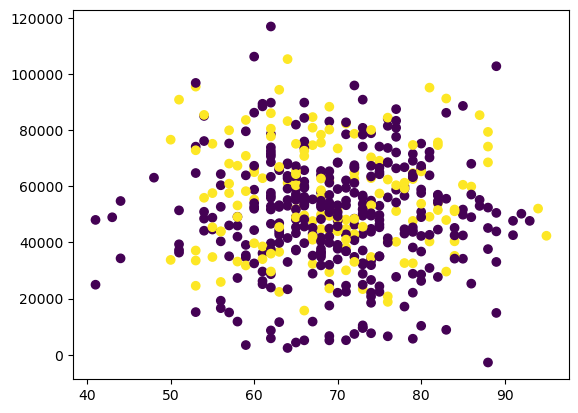

In [29]:
#Plot income age disease
import matplotlib.pyplot as plt


plt.scatter(df["AGE"], df["INCOME"], c = (df["HEART DISEASE"])*20);


#plt.scatter(df["HEART DISEASE"], df["DIABETES"],df["CANCER"]*20);

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

xAxis = df.drop(columns=["AGE", "INDEX", "ID"])
yAxis = df["AGE"]

xTrain, xTest, yTrain, yTest = train_test_split(xAxis, yAxis, test_size=0.2, random_state=42)

mod = DecisionTreeRegressor().fit(xTrain, yTrain)

predTest = mod.predict(xTest)

mseTest = mean_squared_error(yTest, predTest)

print("Mean Squared Error on Testing Set:", mseTest)


Mean Squared Error on Testing Set: 203.38


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

xAxis = df.drop(columns=["AGE", "INDEX", "ID"])
yAxis = df["AGE"]

xTrain, xTest, yTrain, yTest = train_test_split(xAxis, yAxis, test_size=0.2, random_state=42)

mod = DecisionTreeRegressor().fit(xTrain, yTrain)

predTest = mod.predict(xTest)

mseTest = mean_squared_error(yTest, predTest)

meanActual = np.mean(yTest)

percentError = np.sqrt(mseTest) / meanActual * 100

print("Mean Squared Error on Testing Set:", mseTest)
print("Percent Error:", percentError)


Mean Squared Error on Testing Set: 196.53
Percent Error: 19.98419927669231
